# **Group-22 Credit Card Fraud Detection**





# Phase 1: Data Preproccessing

# **Team member Details**:

  Dhairya Luthra	2022A7PS1377H

   Animish Agrahari                                                2022A7PS1367H

   B. Vaishnavi                                                    2022A7PS1357H

# **TASKS DONE**:


1.   Data Cleaning

2.   Data Visualisation

3.   Feature creation

4.   Feature Scaling

5.   Dimensionality reduction using PCA

6.   Sampling




# **Data set information**
This data set was obtained from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

It contains 3 months of transactions with 863007 transactions and 6751 frauds


# **Importing relevant libraries**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler




## **Loading the data set**

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

path = "/content/drive/MyDrive/DataMining_Dataset/all_transactions (4).csv"
df = pd.read_csv(path)
print(df)



        TRANSACTION_ID          TX_DATETIME  CUSTOMER_ID  TERMINAL_ID  \
0                    0  2018-04-01 00:00:31        596.0       3156.0   
1                    1  2018-04-01 00:02:10       4961.0       3412.0   
2                    2  2018-04-01 00:07:56          2.0       1365.0   
3                    3  2018-04-01 00:09:29       4128.0       8737.0   
4                    4  2018-04-01 00:10:34        927.0       9906.0   
...                ...                  ...          ...          ...   
863001          863001  2018-06-29 23:54:44       1476.0       1703.0   
863002          863002  2018-06-29 23:54:59       3818.0       1523.0   
863003          863003  2018-06-29 23:55:39          NaN          NaN   
863004          863004  2018-06-29 23:57:39       4103.0       9712.0   
863005          863005  2018-06-29 23:59:01       2044.0       4481.0   

        TX_AMOUNT  TX_TIME_SECONDS  TX_TIME_DAYS  TX_FRAUD  TX_FRAUD_SCENARIO  
0           57.16             31.0         

# **Data Cleaning**


1.   Describing the data frame
2.   Checking for NULL Values
3.   Dropping records possesing NULL Values
4.   Dropping Duplicate Transactions



In [ ]:
df.head() # checking how the df looks like


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596.0,3156.0,57.16,31.0,0.0,0,0
1,1,2018-04-01 00:02:10,4961.0,3412.0,81.51,130.0,0.0,0,0
2,2,2018-04-01 00:07:56,2.0,1365.0,146.00,476.0,0.0,0,0
3,3,2018-04-01 00:09:29,4128.0,8737.0,64.49,569.0,0.0,0,0
4,4,2018-04-01 00:10:34,927.0,9906.0,50.99,634.0,0.0,0,0


In [ ]:
df.info() #theyre are sum null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863006 entries, 0 to 863005
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   TRANSACTION_ID     863006 non-null  int64  
 1   TX_DATETIME        863006 non-null  object 
 2   CUSTOMER_ID        854376 non-null  float64
 3   TERMINAL_ID        854376 non-null  float64
 4   TX_AMOUNT          854376 non-null  float64
 5   TX_TIME_SECONDS    854376 non-null  float64
 6   TX_TIME_DAYS       854376 non-null  float64
 7   TX_FRAUD           863006 non-null  int64  
 8   TX_FRAUD_SCENARIO  863006 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 59.3+ MB


In [ ]:
df.isnull().sum() #finding no of null values in each collumn

TRANSACTION_ID          0
TX_DATETIME             0
CUSTOMER_ID          8630
TERMINAL_ID          8630
TX_AMOUNT            8630
TX_TIME_SECONDS      8630
TX_TIME_DAYS         8630
TX_FRAUD                0
TX_FRAUD_SCENARIO       0
dtype: int64

# Dropping the NULL Values

since compared to the no of transactions(863006) the no of null values are very small around 0.9% so it makes sense to drop the records having null values

In [ ]:
df = df.dropna()
df.isnull().sum()

TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64

# Dropping the Duplicate Transactions

dropping duplicate transactions


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 854376 entries, 0 to 863005
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   TRANSACTION_ID     854376 non-null  int64  
 1   TX_DATETIME        854376 non-null  object 
 2   CUSTOMER_ID        854376 non-null  float64
 3   TERMINAL_ID        854376 non-null  float64
 4   TX_AMOUNT          854376 non-null  float64
 5   TX_TIME_SECONDS    854376 non-null  float64
 6   TX_TIME_DAYS       854376 non-null  float64
 7   TX_FRAUD           854376 non-null  int64  
 8   TX_FRAUD_SCENARIO  854376 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 65.2+ MB


Dropping TX_TIMESECONDS and TX_DAYS because they are not relevant

In [ ]:
df = df.drop(['TX_TIME_DAYS', 'TX_TIME_SECONDS'], axis=1)


# **Visualising our Data**



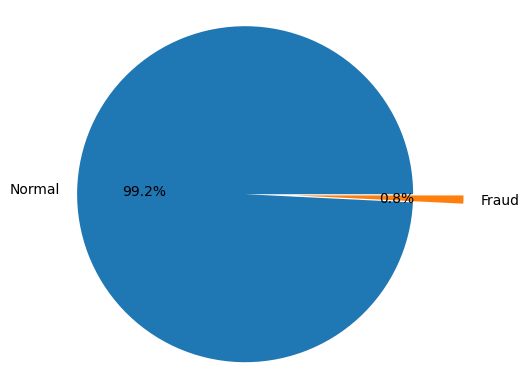

In [ ]:
plt.pie([(df['TX_FRAUD']==0).sum() , (df['TX_FRAUD']==1).sum()], labels=('Normal' , 'Fraud'), explode= [0,.3], autopct= '%1.1f%%',)
plt.axis('equal')
plt.show()


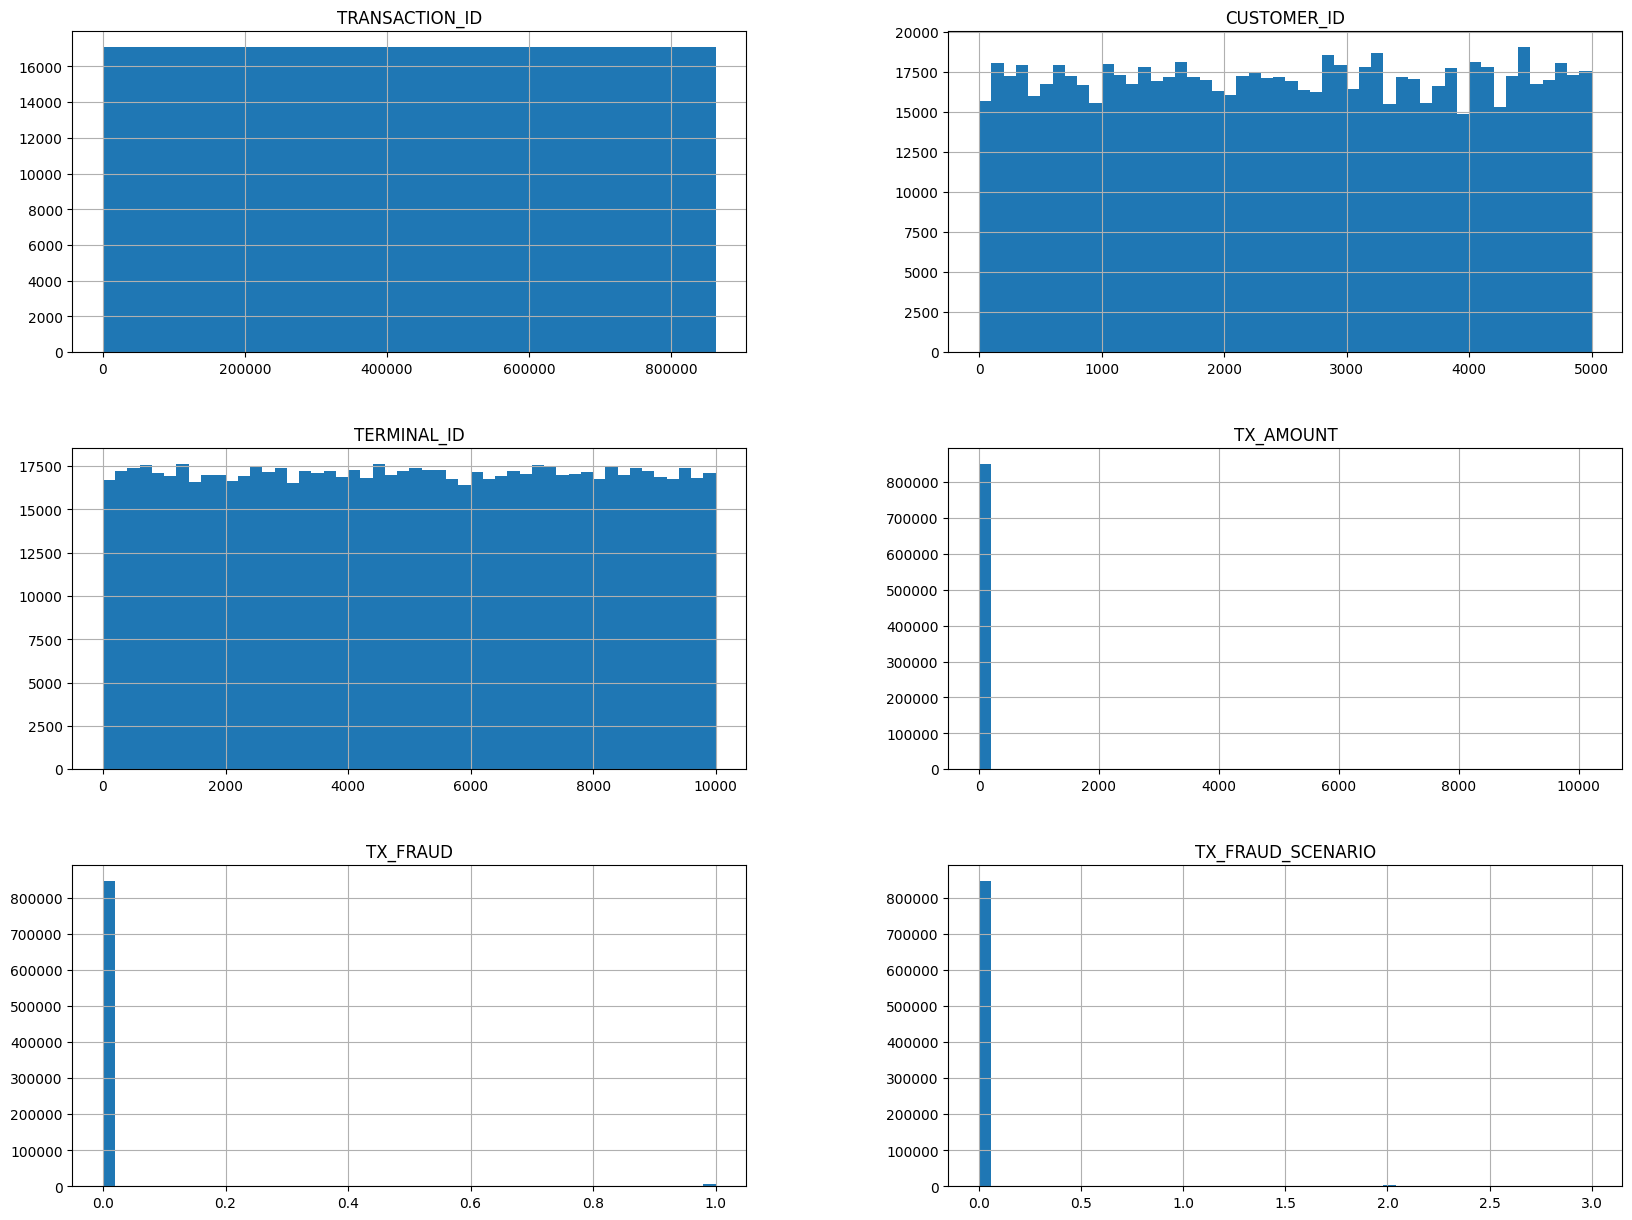

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15))
plt.show()

# **Feature Creation**

We will create some new features that give some more information about the spending patterns of users,transaction time and terminal data which could be relevant for predicting Frauds

Transforming Datetime stamps into 2 Categories based on whether transaction occured during weekend or during weekday and whether transaction occured during day or night

In [ ]:


df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])

# Create a binary feature for weekend transactions (0 for weekday, 1 for weekend)
df['TX_DURING_WEEKEND'] = (df['TX_DATETIME'].dt.dayofweek >= 5).astype(int)

# Create a binary feature for night transactions (0 for day, 1 for night)
df['TX_DURING_NIGHT'] = ((df['TX_DATETIME'].dt.hour < 6) | (df['TX_DATETIME'].dt.hour >= 18)).astype(int)

# Print the updated DataFrame
df.head()


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT
0,0,2018-04-01 00:00:31,596.0,3156.0,57.16,0,0,1,1
1,1,2018-04-01 00:02:10,4961.0,3412.0,81.51,0,0,1,1
2,2,2018-04-01 00:07:56,2.0,1365.0,146.00,0,0,1,1
3,3,2018-04-01 00:09:29,4128.0,8737.0,64.49,0,0,1,1
4,4,2018-04-01 00:10:34,927.0,9906.0,50.99,0,0,1,1


Now we need to create a feature to find the spending pattern of our customers


The new attributes include transaction frequency (CUSTOMER_ID_NB_TX_*DAY_WINDOW) and average transaction amount (CUSTOMER_ID_AVG_AMOUNT_*DAY_WINDOW). Unusual patterns in these features, such as a high number of transactions within short periods or abnormal spending amounts, can signal potential fraud. These attributes enhance the ability to detect anomalies in customer behavior, providing valuable insights for fraud detection models.

In [ ]:
def get_customer_spending_behaviour_features(customer_transactions, windows_size_in_days=[1, 7, 30]):
    # Let us first order transactions chronologically
    customer_transactions = customer_transactions.sort_values('TX_DATETIME')

    # The transaction date and time is set as the index, which will allow the use of the rolling function
    customer_transactions.index = customer_transactions.TX_DATETIME

    # For each window size
    for window_size in windows_size_in_days:
        # Compute the sum of the transaction amounts and the number of transactions for the given window size
        SUM_AMOUNT_TX_WINDOW = customer_transactions['TX_AMOUNT'].rolling(str(window_size)+'d').sum()
        NB_TX_WINDOW = customer_transactions['TX_AMOUNT'].rolling(str(window_size)+'d').count()

        # Compute the average transaction amount for the given window size
        # NB_TX_WINDOW is always >0 since the current transaction is always included
        AVG_AMOUNT_TX_WINDOW = SUM_AMOUNT_TX_WINDOW / NB_TX_WINDOW

        # Save feature values
        customer_transactions['CUSTOMER_ID_NB_TX_'+str(window_size)+'DAY_WINDOW'] = list(NB_TX_WINDOW)
        customer_transactions['CUSTOMER_ID_AVG_AMOUNT_'+str(window_size)+'DAY_WINDOW'] = list(AVG_AMOUNT_TX_WINDOW)

    # Reindex according to transaction IDs
    customer_transactions.index = customer_transactions.TRANSACTION_ID

    # And return the DataFrame with the new features
    return customer_transactions




In [ ]:
# Apply the function to your DataFrame grouped by 'CUSTOMER_ID'
df = df.groupby('CUSTOMER_ID').apply(lambda x: get_customer_spending_behaviour_features(x, windows_size_in_days=[1, 7, 30]))

# Sort the DataFrame by 'TX_DATETIME' and reset the index
df = df.sort_values('TX_DATETIME').reset_index(drop=True)
df.head()


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW
0,0,2018-04-01 00:00:31,596.0,3156.0,57.16,0,0,1,1,1.0,57.16,1.0,57.16,1.0,57.16
1,1,2018-04-01 00:02:10,4961.0,3412.0,81.51,0,0,1,1,1.0,81.51,1.0,81.51,1.0,81.51
2,2,2018-04-01 00:07:56,2.0,1365.0,146.00,0,0,1,1,1.0,146.00,1.0,146.00,1.0,146.00
3,3,2018-04-01 00:09:29,4128.0,8737.0,64.49,0,0,1,1,1.0,64.49,1.0,64.49,1.0,64.49
4,4,2018-04-01 00:10:34,927.0,9906.0,50.99,0,0,1,1,1.0,50.99,1.0,50.99,1.0,50.99


In [ ]:
df.describe()

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW
count,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000
mean,431505.517980,2504.169113,4998.722679,56.215485,0.007809,0.017554,0.277850,0.256717,3.528454,56.234011,18.110737,56.178360,64.612609,56.001031
std,249139.044193,1445.874943,2886.560873,89.129070,0.088024,0.204244,0.447939,0.436822,1.836432,68.366896,7.952624,51.064188,33.617837,40.928120
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.020000,1.000000,0.210000
25%,215745.750000,1252.000000,2503.000000,21.010000,0.000000,0.000000,0.000000,0.000000,2.000000,25.705000,12.000000,28.307885,37.000000,28.891421
50%,431499.500000,2505.000000,4996.000000,44.680000,0.000000,0.000000,0.000000,0.000000,3.000000,49.346667,18.000000,52.523200,67.000000,53.209665
75%,647288.250000,3765.000000,7498.000000,77.000000,0.000000,0.000000,1.000000,1.000000,5.000000,76.173333,24.000000,77.132026,93.000000,78.090442
max,863005.000000,4999.000000,9999.000000,10218.750000,1.000000,3.000000,1.000000,1.000000,14.000000,5273.125000,51.000000,2109.250000,152.000000,1288.540000



The code has generated additional features for each terminal ID, assessing the risk of fraudulent transactions. These features include the average number of fraudulent transactions (TERMINAL_ID_RISK_*DAY_WINDOW) and the total number of transactions (TERMINAL_ID_NB_TX_*DAY_WINDOW) within specified time windows (1, 7, and 30 days). The risk scores are computed with a one-week delay period, acknowledging the typical time it takes to discover and label fraudulent transactions. These features provide insights into the historical risk associated with each terminal, aiding in the identification of terminals with heightened exposure to fraudulent activities. Such attributes are valuable for strengthening fraud detection models, enhancing their ability to pinpoint high-risk terminals and improve overall fraud prevention measures.






In [ ]:
def get_count_risk_rolling_window(terminal_transactions, delay_period=7, windows_size_in_days=[1, 7, 30], feature="TERMINAL_ID"):
    terminal_transactions = terminal_transactions.sort_values('TX_DATETIME')
    terminal_transactions.index = terminal_transactions.TX_DATETIME

    NB_FRAUD_DELAY = terminal_transactions['TX_FRAUD'].rolling(str(delay_period)+'d').sum()
    NB_TX_DELAY = terminal_transactions['TX_FRAUD'].rolling(str(delay_period)+'d').count()

    for window_size in windows_size_in_days:
        NB_FRAUD_DELAY_WINDOW = terminal_transactions['TX_FRAUD'].rolling(str(delay_period+window_size)+'d').sum()
        NB_TX_DELAY_WINDOW = terminal_transactions['TX_FRAUD'].rolling(str(delay_period+window_size)+'d').count()

        NB_FRAUD_WINDOW = NB_FRAUD_DELAY_WINDOW - NB_FRAUD_DELAY
        NB_TX_WINDOW = NB_TX_DELAY_WINDOW - NB_TX_DELAY

        RISK_WINDOW = NB_FRAUD_WINDOW / NB_TX_WINDOW

        terminal_transactions[feature+'_NB_TX_'+str(window_size)+'DAY_WINDOW'] = list(NB_TX_WINDOW)
        terminal_transactions[feature+'_RISK_'+str(window_size)+'DAY_WINDOW'] = list(RISK_WINDOW)

    terminal_transactions.index = terminal_transactions.TRANSACTION_ID
    terminal_transactions.fillna(0, inplace=True)

    return terminal_transactions



In [ ]:
# Apply the function to the entire DataFrame grouped by 'TERMINAL_ID'
df = df.groupby('TERMINAL_ID').apply(lambda x: get_count_risk_rolling_window(x, delay_period=7, windows_size_in_days=[1, 7, 30], feature="TERMINAL_ID"))

# Sort the DataFrame by 'TX_DATETIME' and reset the index
df = df.sort_values('TX_DATETIME').reset_index(drop=True)


In [ ]:
df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,...,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,0,2018-04-01 00:00:31,596.0,3156.0,57.16,0,0,1,1,1.0,...,1.0,57.16,1.0,57.16,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2018-04-01 00:02:10,4961.0,3412.0,81.51,0,0,1,1,1.0,...,1.0,81.51,1.0,81.51,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2018-04-01 00:07:56,2.0,1365.0,146.00,0,0,1,1,1.0,...,1.0,146.00,1.0,146.00,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2018-04-01 00:09:29,4128.0,8737.0,64.49,0,0,1,1,1.0,...,1.0,64.49,1.0,64.49,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2018-04-01 00:10:34,927.0,9906.0,50.99,0,0,1,1,1.0,...,1.0,50.99,1.0,50.99,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

df.describe()

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
count,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.00000
mean,431505.517980,2504.169113,4998.722679,56.215485,0.007809,0.017554,0.277850,0.256717,3.528454,56.234011,18.110737,56.178360,64.612609,56.001031,0.908674,0.004415,6.130811,0.006869,22.461320,0.00612
std,249139.044193,1445.874943,2886.560873,89.129070,0.088024,0.204244,0.447939,0.436822,1.836432,68.366896,7.952624,51.064188,33.617837,40.928120,1.010178,0.063104,3.495925,0.066081,12.761912,0.05043
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.020000,1.000000,0.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,215745.750000,1252.000000,2503.000000,21.010000,0.000000,0.000000,0.000000,0.000000,2.000000,25.705000,12.000000,28.307885,37.000000,28.891421,0.000000,0.000000,4.000000,0.000000,14.000000,0.00000
50%,431499.500000,2505.000000,4996.000000,44.680000,0.000000,0.000000,0.000000,0.000000,3.000000,49.346667,18.000000,52.523200,67.000000,53.209665,1.000000,0.000000,6.000000,0.000000,24.000000,0.00000
75%,647288.250000,3765.000000,7498.000000,77.000000,0.000000,0.000000,1.000000,1.000000,5.000000,76.173333,24.000000,77.132026,93.000000,78.090442,1.000000,0.000000,8.000000,0.000000,31.000000,0.00000
max,863005.000000,4999.000000,9999.000000,10218.750000,1.000000,3.000000,1.000000,1.000000,14.000000,5273.125000,51.000000,2109.250000,152.000000,1288.540000,10.000000,1.000000,25.000000,1.000000,76.000000,1.00000


Dropping the timestamp column

In [ ]:

df = df.drop('TX_DATETIME',axis = 1)

In [ ]:
df.head()

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,0,596.0,3156.0,57.16,0,0,1,1,1.0,57.16,1.0,57.16,1.0,57.16,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4961.0,3412.0,81.51,0,0,1,1,1.0,81.51,1.0,81.51,1.0,81.51,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2.0,1365.0,146.00,0,0,1,1,1.0,146.00,1.0,146.00,1.0,146.00,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4128.0,8737.0,64.49,0,0,1,1,1.0,64.49,1.0,64.49,1.0,64.49,0.0,0.0,0.0,0.0,0.0,0.0
4,4,927.0,9906.0,50.99,0,0,1,1,1.0,50.99,1.0,50.99,1.0,50.99,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.describe()

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
count,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.000000,854376.00000
mean,431505.517980,2504.169113,4998.722679,56.215485,0.007809,0.017554,0.277850,0.256717,3.528454,56.234011,18.110737,56.178360,64.612609,56.001031,0.908674,0.004415,6.130811,0.006869,22.461320,0.00612
std,249139.044193,1445.874943,2886.560873,89.129070,0.088024,0.204244,0.447939,0.436822,1.836432,68.366896,7.952624,51.064188,33.617837,40.928120,1.010178,0.063104,3.495925,0.066081,12.761912,0.05043
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.020000,1.000000,0.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,215745.750000,1252.000000,2503.000000,21.010000,0.000000,0.000000,0.000000,0.000000,2.000000,25.705000,12.000000,28.307885,37.000000,28.891421,0.000000,0.000000,4.000000,0.000000,14.000000,0.00000
50%,431499.500000,2505.000000,4996.000000,44.680000,0.000000,0.000000,0.000000,0.000000,3.000000,49.346667,18.000000,52.523200,67.000000,53.209665,1.000000,0.000000,6.000000,0.000000,24.000000,0.00000
75%,647288.250000,3765.000000,7498.000000,77.000000,0.000000,0.000000,1.000000,1.000000,5.000000,76.173333,24.000000,77.132026,93.000000,78.090442,1.000000,0.000000,8.000000,0.000000,31.000000,0.00000
max,863005.000000,4999.000000,9999.000000,10218.750000,1.000000,3.000000,1.000000,1.000000,14.000000,5273.125000,51.000000,2109.250000,152.000000,1288.540000,10.000000,1.000000,25.000000,1.000000,76.000000,1.00000


#  **Feature Scaling**
since all the continous features have a distribution similar to Gausian we would go forward with Data Standardisation



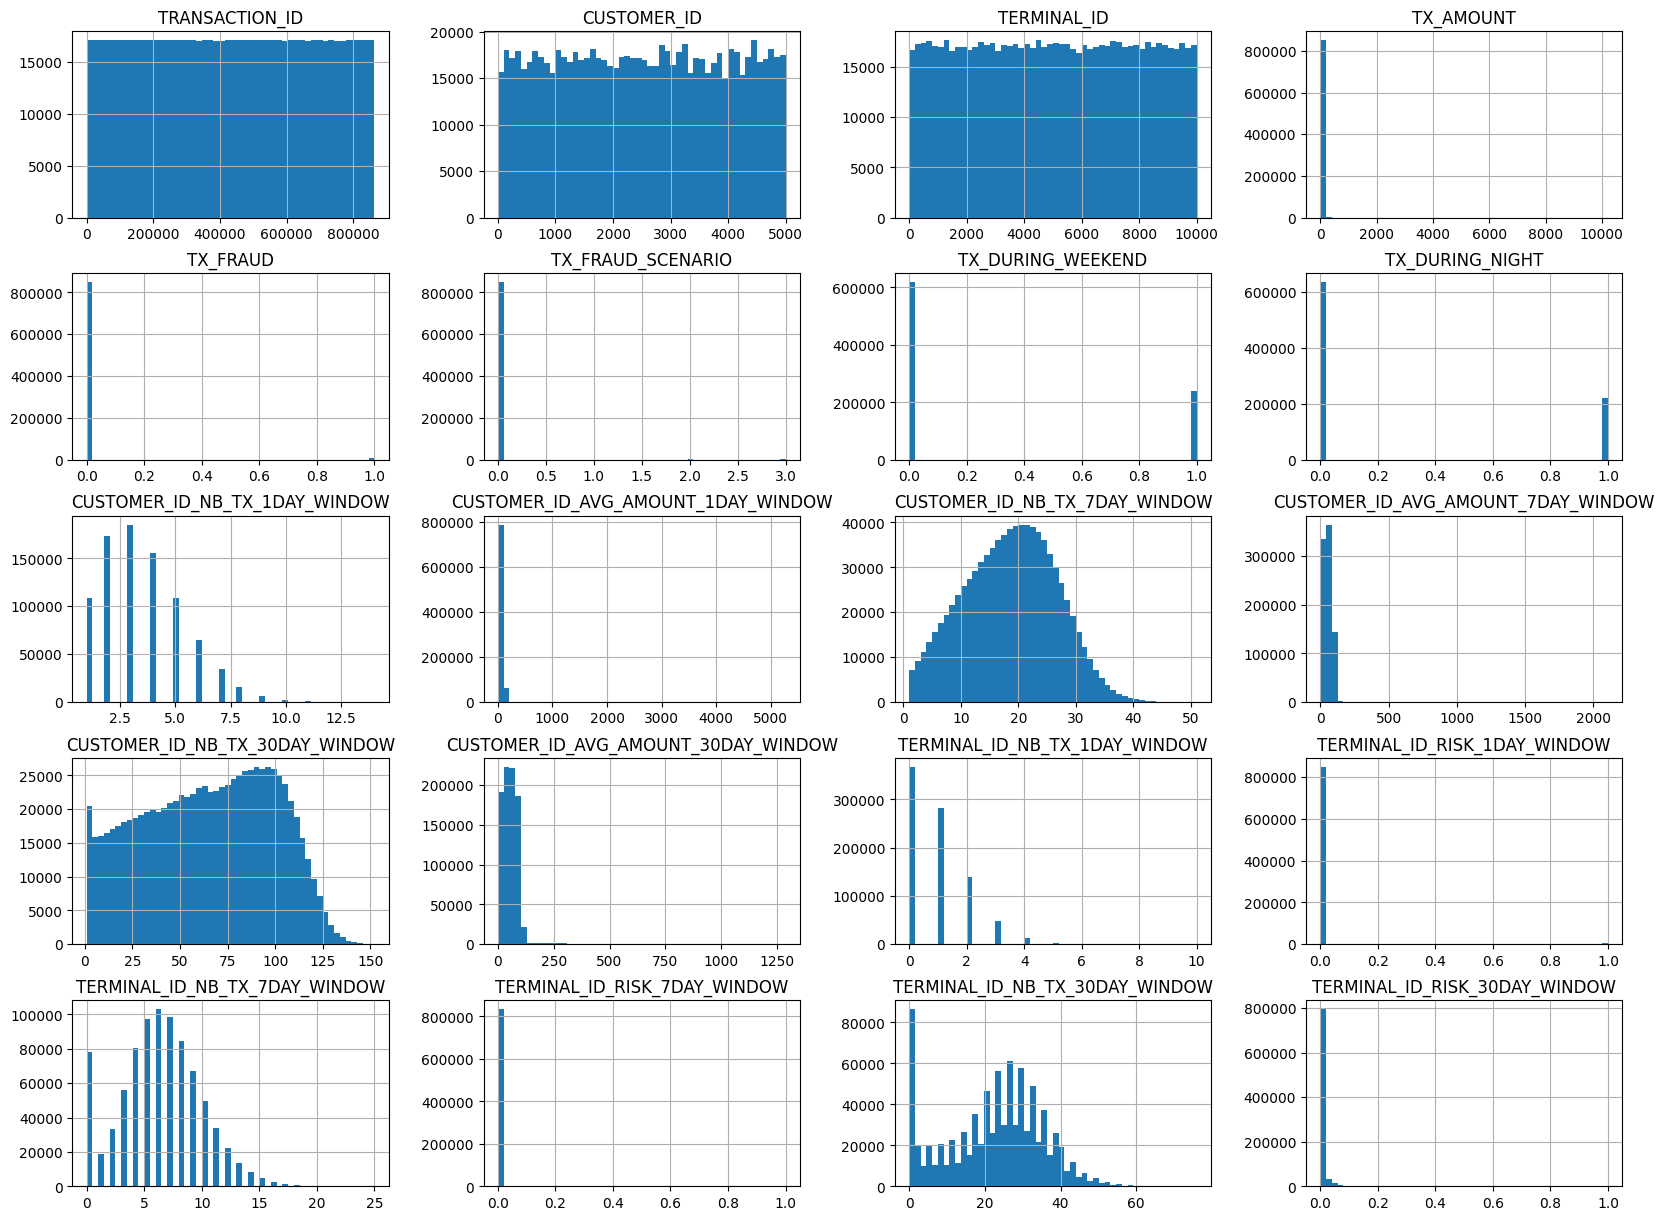

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15))
plt.show()


In [ ]:



columns_to_scale = ['TX_AMOUNT',
    'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW',
    'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW',
      'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW',
    'TERMINAL_ID_RISK_1DAY_WINDOW',
      'TERMINAL_ID_RISK_7DAY_WINDOW',
    'TERMINAL_ID_RISK_30DAY_WINDOW',
    'CUSTOMER_ID_NB_TX_1DAY_WINDOW',
    'CUSTOMER_ID_NB_TX_7DAY_WINDOW',
    'CUSTOMER_ID_NB_TX_30DAY_WINDOW',
    'TERMINAL_ID_NB_TX_1DAY_WINDOW',
    'TERMINAL_ID_NB_TX_7DAY_WINDOW',
    'TERMINAL_ID_NB_TX_30DAY_WINDOW',]


scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [ ]:
df.head()

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,0,596.0,3156.0,0.010597,0,0,1,1,-1.37683,0.013544,-2.151585,0.019224,-1.892229,0.028317,-0.899519,-0.069963,-1.753703,-0.103947,-1.760029,-0.121359
1,1,4961.0,3412.0,0.283797,0,0,1,1,-1.37683,0.369711,-2.151585,0.496075,-1.892229,0.623263,-0.899519,-0.069963,-1.753703,-0.103947,-1.760029,-0.121359
2,2,2.0,1365.0,1.007354,0,0,1,1,-1.37683,1.313004,-2.151585,1.758996,-1.892229,2.198953,-0.899519,-0.069963,-1.753703,-0.103947,-1.760029,-0.121359
3,3,4128.0,8737.0,0.092837,0,0,1,1,-1.37683,0.120760,-2.151585,0.162769,-1.892229,0.207412,-0.899519,-0.069963,-1.753703,-0.103947,-1.760029,-0.121359
4,4,927.0,9906.0,-0.058628,0,0,1,1,-1.37683,-0.076704,-2.151585,-0.101605,-1.892229,-0.122435,-0.899519,-0.069963,-1.753703,-0.103947,-1.760029,-0.121359


In [ ]:
df.describe()

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
count,854376.000000,854376.000000,854376.000000,8.543760e+05,854376.000000,854376.000000,854376.000000,854376.000000,8.543760e+05,8.543760e+05,8.543760e+05,8.543760e+05,8.543760e+05,8.543760e+05,8.543760e+05,8.543760e+05,8.543760e+05,8.543760e+05,8.543760e+05,8.543760e+05
mean,431505.517980,2504.169113,4998.722679,1.008668e-16,0.007809,0.017554,0.277850,0.256717,-8.236257e-17,1.642511e-17,1.936749e-16,2.948785e-16,2.339268e-16,1.345528e-16,9.969833e-17,2.310327e-17,-1.437093e-17,-9.547355e-18,-1.144352e-16,-7.917318e-18
std,249139.044193,1445.874943,2886.560873,1.000001e+00,0.088024,0.204244,0.447939,0.436822,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,0.000000,0.000000,0.000000,-6.307204e-01,0.000000,0.000000,0.000000,0.000000,-1.376830e+00,-8.225332e-01,-2.151585e+00,-1.099761e+00,-1.892229e+00,-1.363147e+00,-8.995190e-01,-6.996304e-02,-1.753703e+00,-1.039465e-01,-1.760029e+00,-1.213593e-01
25%,215745.750000,1252.000000,2503.000000,-3.949947e-01,0.000000,0.000000,0.000000,0.000000,-8.322957e-01,-4.465469e-01,-7.683930e-01,-5.457933e-01,-8.213683e-01,-6.623716e-01,-8.995190e-01,-6.996304e-02,-6.095132e-01,-1.039465e-01,-6.630139e-01,-1.213593e-01
50%,431499.500000,2505.000000,4996.000000,-1.294246e-01,0.000000,0.000000,0.000000,0.000000,-2.877612e-01,-1.007410e-01,-1.392459e-02,-7.157976e-02,7.101566e-02,-6.820171e-02,9.040620e-02,-6.996304e-02,-3.741823e-02,-1.039465e-01,1.205682e-01,-1.213593e-01
75%,647288.250000,3765.000000,7498.000000,2.331958e-01,0.000000,0.000000,1.000000,1.000000,8.013079e-01,2.916519e-01,7.405438e-01,4.103400e-01,8.444151e-01,5.397126e-01,9.040620e-02,-6.996304e-02,5.346768e-01,-1.039465e-01,6.690756e-01,-1.213593e-01
max,863005.000000,4999.000000,9999.000000,1.140205e+02,1.000000,3.000000,1.000000,1.000000,5.702119e+00,7.630731e+01,4.135652e+00,4.020573e+01,2.599437e+00,3.011474e+01,8.999733e+00,1.577703e+01,5.397484e+00,1.502908e+01,4.195195e+00,1.970819e+01


# **Dimensionality Reduction using PCA**

In [ ]:

from sklearn.decomposition import PCA


numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]

# Separate the 'TX_Fraud' column
tx_fraud_column = df['TX_FRAUD']
df_numeric = df_numeric.drop('TX_FRAUD',axis = 1)
df_numeric = df_numeric.drop('TX_FRAUD_SCENARIO',axis = 1)



# Apply PCA
n_components = 5  # Set the number of principal components
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_numeric)

# Create a DataFrame with the principal components
columns_pca = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(data=df_pca, columns=columns_pca)

# Concatenate the principal components with the original DataFrame
df_result = pd.concat([df[['TRANSACTION_ID', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT']], df_pca, tx_fraud_column], axis=1)

# Display the results
print(df_result.head())
df = df_result


   TRANSACTION_ID  CUSTOMER_ID  TERMINAL_ID  TX_AMOUNT            PC1  \
0               0        596.0       3156.0   0.010597  431505.479044   
1               1       4961.0       3412.0   0.283797  431504.500882   
2               2          2.0       1365.0   1.007354  431503.446309   
3               3       4128.0       8737.0   0.092837  431502.587792   
4               4        927.0       9906.0  -0.058628  431501.594772   

           PC2          PC3       PC4       PC5  TX_FRAUD  
0 -1850.375991  1909.569504 -0.012413 -0.804985         0  
1 -1593.598690 -2455.384843  0.840166 -0.821245         0  
2 -3641.481707  2503.250561  3.080088 -0.893905         0  
3  3731.252924 -1621.436624  0.252284 -0.782737         0  
4  4899.682911  1579.771488 -0.219680 -0.768630         0  


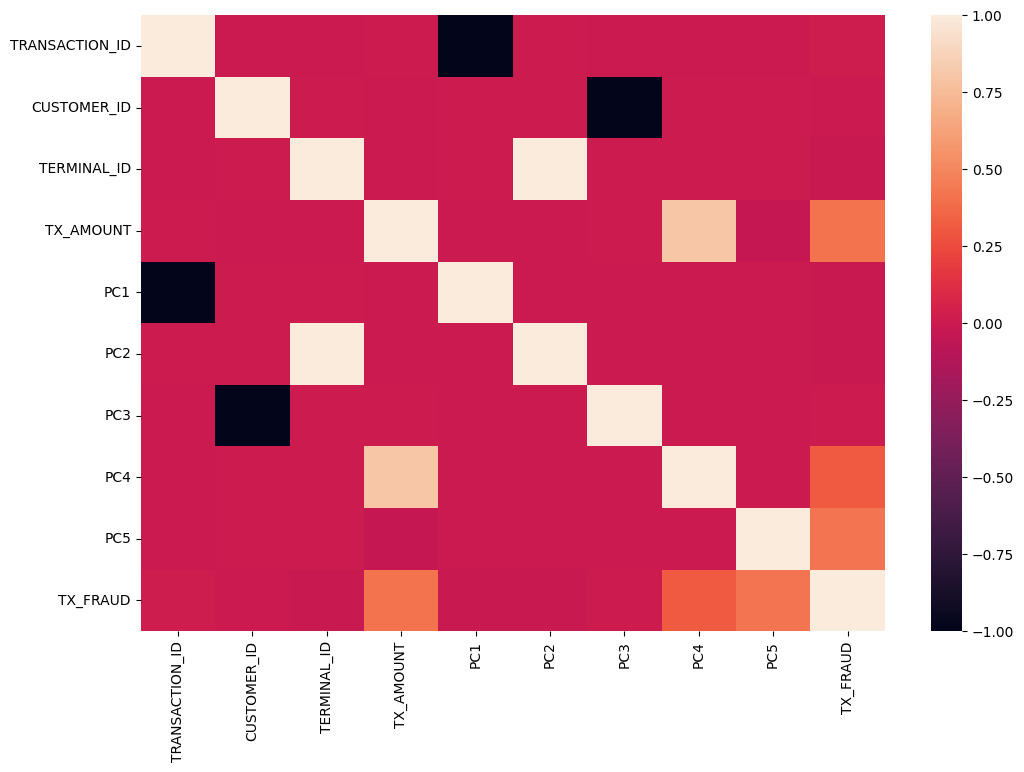

In [ ]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(), ax=ax)
plt.show()

# **Sampling**

1.   Random Oversampling
2.   Random UnderSampling



Random Oversampling:
Randomly replicate instances from the minority class to balance the class distribution.

In [ ]:


# Separate majority and minority classes
majority_class = df[df['TX_FRAUD'] == 0]
minority_class = df[df['TX_FRAUD'] == 1]

# Upsample minority class
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine majority class with upsampled minority class
df_balanced_Oversampling = pd.concat([majority_class, minority_upsampled])



In [ ]:
df_balanced_Oversampling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1695408 entries, 0 to 779023
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   TRANSACTION_ID  int64  
 1   CUSTOMER_ID     float64
 2   TERMINAL_ID     float64
 3   TX_AMOUNT       float64
 4   PC1             float64
 5   PC2             float64
 6   PC3             float64
 7   PC4             float64
 8   PC5             float64
 9   TX_FRAUD        int64  
dtypes: float64(8), int64(2)
memory usage: 142.3 MB


In [ ]:
df_balanced_Oversampling.head()

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,PC1,PC2,PC3,PC4,PC5,TX_FRAUD
0,0,596.0,3156.0,0.010597,431505.479044,-1850.375991,1909.569504,-0.012413,-0.804985,0
1,1,4961.0,3412.0,0.283797,431504.500882,-1593.598690,-2455.384843,0.840166,-0.821245,0
2,2,2.0,1365.0,1.007354,431503.446309,-3641.481707,2503.250561,3.080088,-0.893905,0
3,3,4128.0,8737.0,0.092837,431502.587792,3731.252924,-1621.436624,0.252284,-0.782737,0
4,4,927.0,9906.0,-0.058628,431501.594772,4899.682911,1579.771488,-0.219680,-0.768630,0


Random UnderSampling:Randomly remove some instances from the majority class to balance the class distribution.

In [ ]:


# Downsample majority class
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

# Combine minority class with downsampled majority class
df_balanced_underSampling = pd.concat([majority_downsampled, minority_class])


In [ ]:
df_balanced_underSampling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13344 entries, 595457 to 854367
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TRANSACTION_ID  13344 non-null  int64  
 1   CUSTOMER_ID     13344 non-null  float64
 2   TERMINAL_ID     13344 non-null  float64
 3   TX_AMOUNT       13344 non-null  float64
 4   PC1             13344 non-null  float64
 5   PC2             13344 non-null  float64
 6   PC3             13344 non-null  float64
 7   PC4             13344 non-null  float64
 8   PC5             13344 non-null  float64
 9   TX_FRAUD        13344 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 1.1 MB


In [ ]:
df_balanced_underSampling.head()

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,PC1,PC2,PC3,PC4,PC5,TX_FRAUD
595457,601490,421.0,5303.0,-0.283359,-169984.485200,306.787411,2082.542327,-1.030103,0.580121,0
893,901,1580.0,63.0,-0.410702,430604.430569,-4943.185446,925.015129,-1.323172,-0.784858,0
512530,517700,526.0,748.0,0.379725,-86194.561981,-4249.613966,1977.066854,1.037612,-0.098866,0
755864,763534,2168.0,1600.0,1.231636,-332028.540925,-3393.154970,334.233828,2.143204,-0.170869,0
480824,485685,2350.0,7622.0,0.202678,-54179.438172,2624.168107,154.419215,0.668737,-0.371535,0
